## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [ ]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
# Load the csv file into a dataframe
# Your code here
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
euk = pd.read_csv(tsvFile, sep = '\t')
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names? 
*Note:* 
- *Mammals are under Class*
- *Scientific names are under Species*


In [ ]:
# Your code here . . .
euk['Number of genes'] = pd.to_numeric(euk["Number of genes"], errors= 'coerce')
mammals_with_genes = euk[(euk.Class == 'Mammals') & (euk['Number of genes'] >= (20000))]
mammals_with_genes.Species.tolist()

['Homo sapiens',
 'Mus musculus',
 'Rattus norvegicus',
 'Felis catus',
 'Bos taurus',
 'Ovis aries',
 'Canis lupus familiaris',
 'Sus scrofa',
 'Ornithorhynchus anatinus',
 'Equus caballus',
 'Pan troglodytes',
 'Macaca mulatta',
 'Monodelphis domestica',
 'Loxodonta africana',
 'Sorex araneus',
 'Erinaceus europaeus',
 'Cavia porcellus',
 'Echinops telfairi',
 'Dasypus novemcinctus',
 'Oryctolagus cuniculus',
 'Pongo abelii',
 'Canis lupus dingo',
 'Papio anubis',
 'Callithrix jacchus',
 'Otolemur garnettii',
 'Ictidomys tridecemlineatus',
 'Nomascus leucogenys',
 'Myotis lucifugus',
 'Pteropus vampyrus',
 'Tursiops truncatus',
 'Microcebus murinus',
 'Dipodomys ordii',
 'Macaca fascicularis',
 'Ochotona princeps',
 'Bubalus bubalis',
 'Galeopterus variegatus',
 'Vicugna pacos',
 'Gorilla gorilla gorilla',
 'Ailuropoda melanoleuca',
 'Cricetulus griseus',
 'Sarcophilus harrisii',
 'Mustela putorius furo',
 'Bos indicus',
 'Odocoileus virginianus texanus',
 'Saimiri boliviensis bolivi

### Q2. Animals are a part of Kingdom. How many genomes are there for each Class of Animals?

In [ ]:
# Your code here . . .
animals = euk[euk["Kingdom"] == "Animals"]
animals.Class.value_counts()

Mammals          658
Insects          602
Fishes           282
Other Animals    210
Birds            172
Roundworms       162
Flatworms         47
Reptiles          41
Amphibians         7
Name: Class, dtype: int64

### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [ ]:
# Your code here . . .
animal_classes = animals.Class.unique()
#animal_classes
for Class in animal_classes:
  print(Class, animals[animals.Class == Class].Species.nunique())

Roundworms 116
Insects 402
Fishes 218
Other Animals 171
Mammals 313
Amphibians 6
Birds 144
Flatworms 34
Reptiles 38


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens.*

In [ ]:
# Your code here . . .
mammals_with_genus_macaca = animals[(animals.Class == "Mammals") & (animals.Species.str.split(' ').str[0] == "Macaca")]
mammals_with_genus_macaca.Species.unique().tolist()

['Macaca mulatta',
 'Macaca fascicularis',
 'Macaca nemestrina',
 'Macaca fuscata fuscata']

### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column Species that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using .str[0:2] which will give you a list. You can then use .str.join(" ") to change it back to a string.

In [ ]:
# Your code here . . .
new_euk = euk.copy()
#new_species = new_euk.Species.str.split(' ').str[0:2]
new_euk ['Species'] = new_euk.Species.str.split(' ').str[0:2].str.join(" ")
new_euk.drop(columns= ['GC%', 'Publication year', 'Assembly status'])

,Species,Kingdom,Class,Size (Mb),Number of genes,Number of proteins
0,Emiliania huxleyi,Protists,Other Protists,167.676000,38549.0,38554
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,38311.0,48265
2,Glycine max,Plants,Land Plants,979.046000,59847.0,71219
3,Medicago truncatula,Plants,Land Plants,412.924000,37603.0,41939
4,Solanum lycopersicum,Plants,Land Plants,828.349000,31200.0,37660
...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,NaN,-
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,155.0,298
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,NaN,-
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,NaN,-


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [ ]:
# Create a new dataframe that contains the number of unique Species and 
# the index is the corresponding Animals Class.

# Your code here . . .
new_animals = new_euk[new_euk["Kingdom"] == "Animals"]
new_animals_classes = new_animals.Class.unique()
CLASS = []
unique_species = []
for Class in new_animals_classes:
  CLASS.append(Class)
  unique_species.append(new_animals[new_animals.Class == Class].Species.nunique())

df = pd.DataFrame(CLASS ,columns = ['Class']) 
df['Unique species'] = unique_species
df.set_index('Class')

,Unique species
Class,
Roundworms,111
Insects,360
Fishes,217
Other Animals,169
Mammals,296
Amphibians,6
Birds,140
Flatworms,34
Reptiles,38


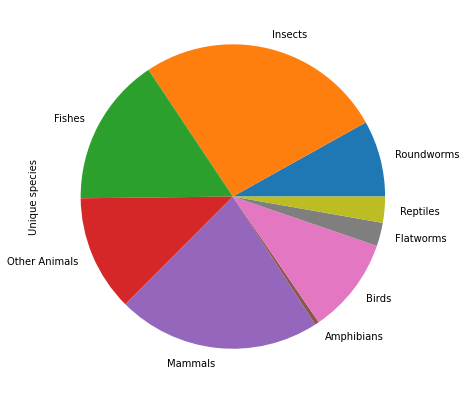

In [ ]:
# Create a panda pie plot using the dataframe above

# Your code here . . .
df.plot.pie(y = 'Unique species', figsize=(7,7), labels = df['Class'], legend = False)